**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is**

Data Description -

*   Battery_power - Total energy a battery can store in one time measured in mAh
*Blue - Has bluetooth or not,
*Clock_speed - speed at which microprocessor executes instructions,
*Dual_sim - Has dual sim support or not,
*Fc - Front Camera mega pixels,
*Four_g - Has 4G or not,
*Int_memory - Internal Memory in Gigabytes,
*M_dep - Mobile Depth in cm,
*Mobile_wt - Weight of mobile phone,
*N_cores - Number of cores of processor,
*Pc - Primary Camera mega pixels,
*Px_height - Pixel Resolution Height,
*Px_width - Pixel Resolution Width,
*Ram - Random Access Memory in Mega,
*Touch_screen - Has touch screen or not,
*Wifi - Has wifi or not,
*Sc_w - Screen Width of mobile in cm,
*Talk_time - longest time that a single battery charge will last when you are
*Three_g - Has 3G or not,
*Wifi - Has wifi or not,
*Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).











## **Why mobile price prediction is important for businesses?**

#### Mobile phones come in all sorts of prices, features, specifications. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that the consumers find it appropriate to buy the product.

#### This kind of prediction will help businesses estimate price of mobiles accurately to give good competition to other manufacturers and place their own product in the correct segment.

### **Import Data ,Libraries** and **Data Preprocessing**

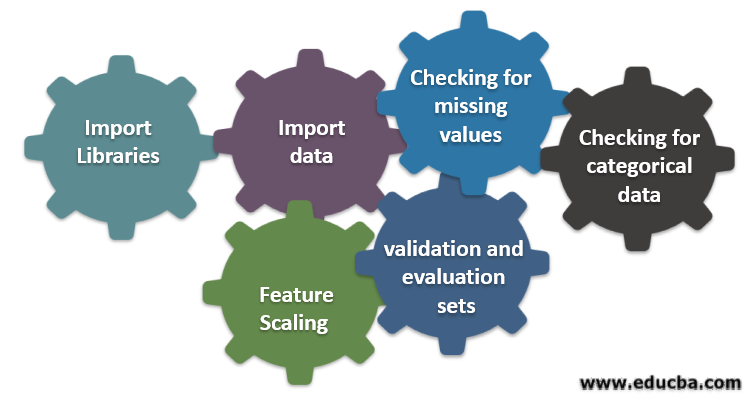

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [13,7]
sns.set(rc={'figure.figsize':(13,7)})

In [2]:
dataset = pd.read_csv("data_mobile_price_range.csv")

In [3]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# last 5 rows of the data
dataset.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
dataset.shape

(2000, 21)

## **Data Summary:**

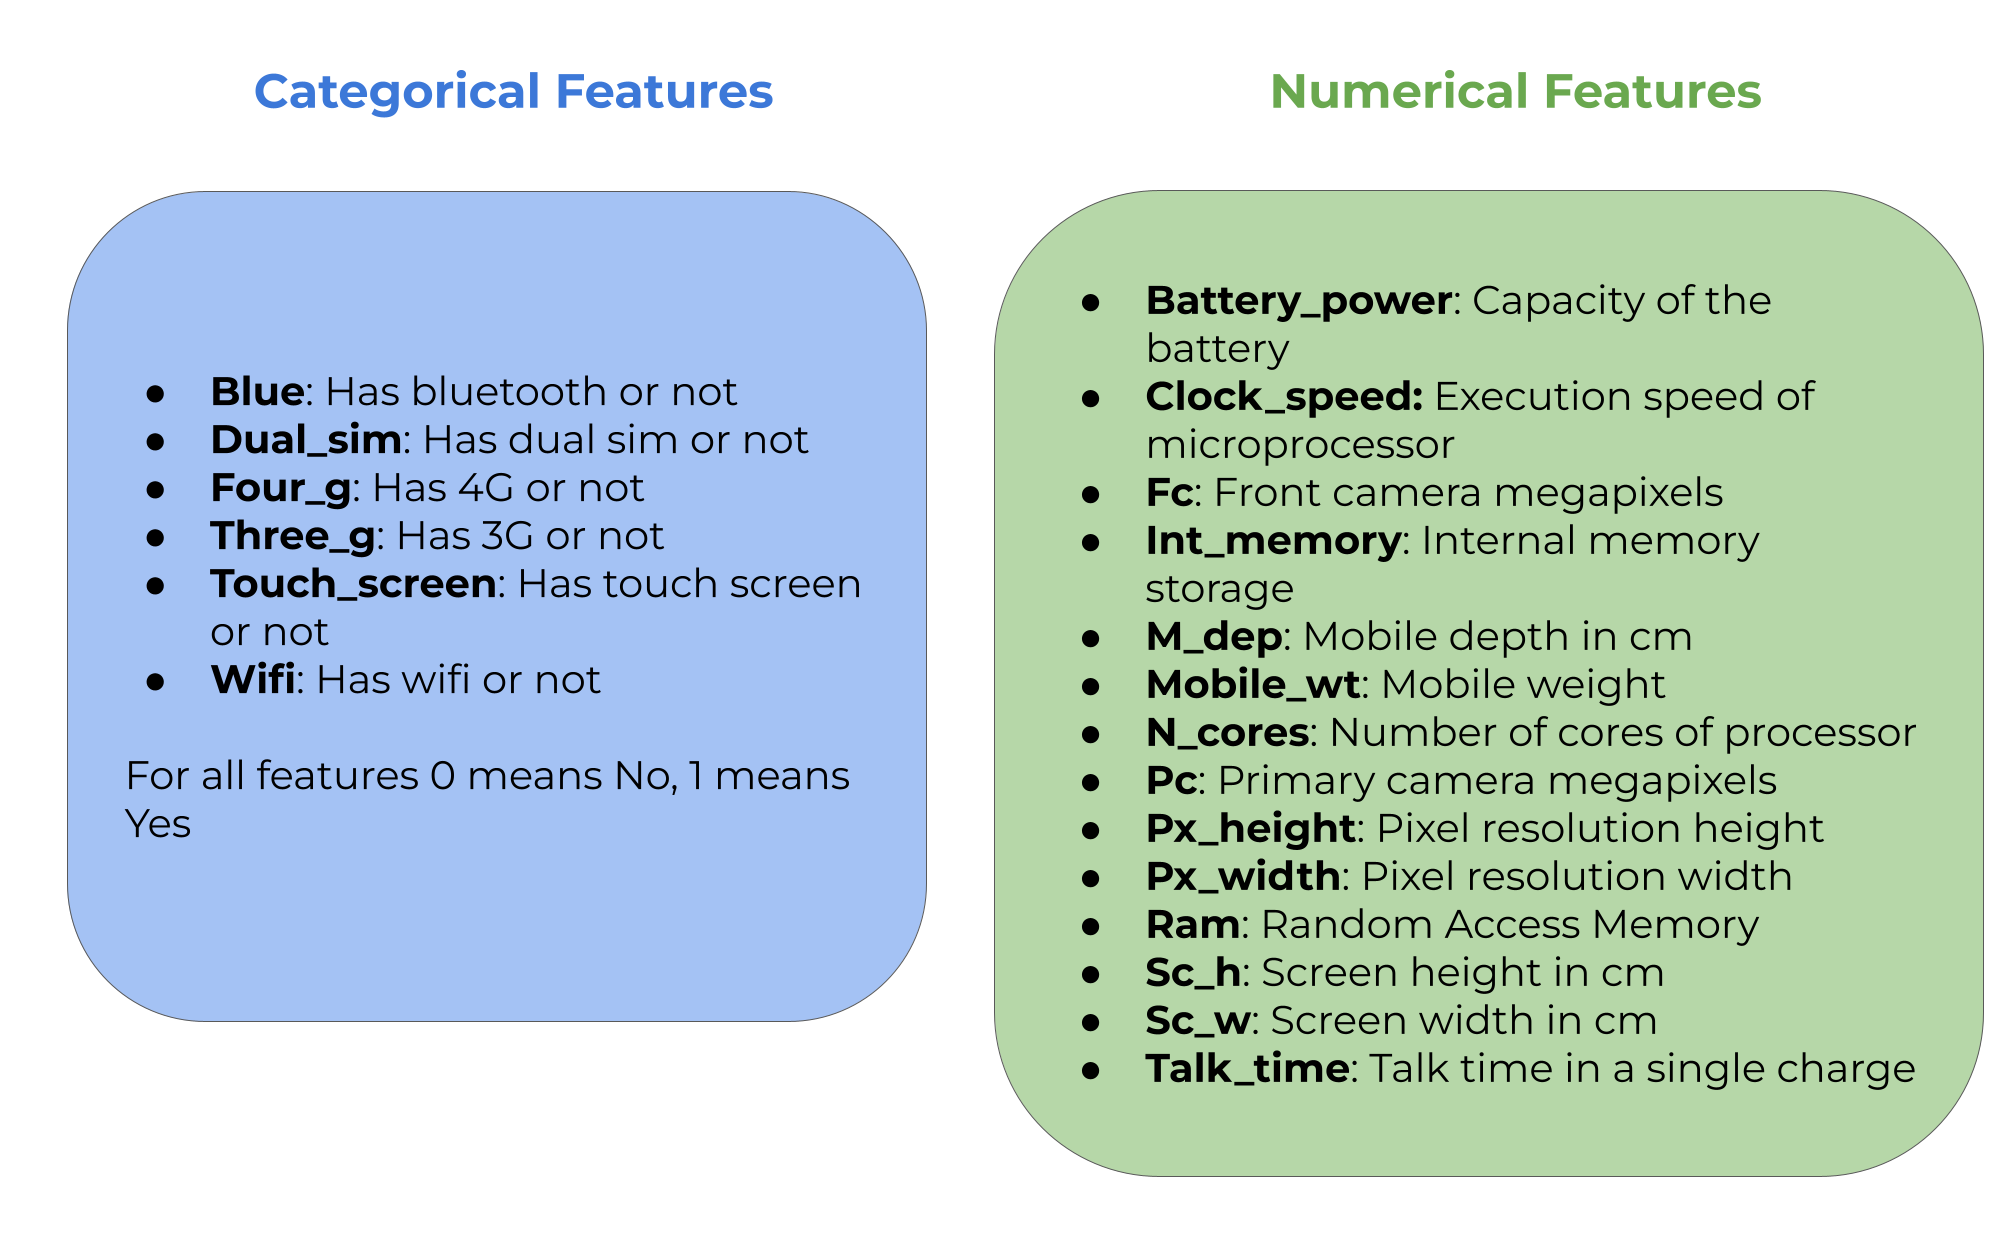

## **Information/Description of the Data:**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# description of the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


* The dataset doesn't contain any null values as per the info() tells us but we can see some anomalies like minimum of px_height and sc_w is zero which cannot be true.

* The pixel resolution and screen width cannot be zero in any mobile phone so we will have to remove the data which contains these zero values.

---



## **Handling duplicates and missing values in the dataset:**

#### When using data, most people agree that your insights and analysis are only as good as the data you are using. Essentially, garbage data in is garbage analysis out. Data cleaning, also referred to as data cleansing and data scrubbing, is one of the most important steps in data analysis.

#### Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct. There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.

#### Missing or duplicate data may exist in a dataset for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as combining data, reindexing data, and reshaping data. Other times, it exists in the original dataset for reasons such as user input error or data storage or conversion issues.

#### In the case of missing values, they may also exist in the original dataset to purposely indicate that data is unavailable.

#### **Why do we need to fill in the missing data?**

#### Because most of the machine learning models that we want to use will provide an error if we pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce our model accuracy significantly. For filling up missing values, there are many methods available but for choosing the best method, we need to understand the type of missing value and its significance, before we start handling those missing values.

In [8]:
# Checking Null Values Present in dataset
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# check for duplicated records
dataset.duplicated().sum()

0

* The dataset is almost a clean one with no null values or duplicate records.

* We will remove the data where the pixel resolution height and screen width contains zero value.

In [10]:
# remove zero values of pixel resolution height and screen width

dataset = dataset[dataset['px_height'] != 0]
dataset = dataset[dataset['sc_w'] != 0]
dataset.shape

(1819, 21)

In [11]:
# Let's check the Description Data Again

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,1819.0,1238.031336,439.989288,501.0,845.0,1231.0,1611.0,1998.0
blue,1819.0,0.503573,0.500125,0.0,0.0,1.0,1.0,1.0
clock_speed,1819.0,1.519406,0.813975,0.5,0.7,1.5,2.2,3.0
dual_sim,1819.0,0.504673,0.500116,0.0,0.0,1.0,1.0,1.0
fc,1819.0,4.319956,4.355982,0.0,1.0,3.0,7.0,19.0
four_g,1819.0,0.524464,0.499538,0.0,0.0,1.0,1.0,1.0
int_memory,1819.0,32.156130,18.105723,2.0,16.0,32.0,48.0,64.0
m_dep,1819.0,0.499835,0.288875,0.1,0.2,0.5,0.8,1.0
mobile_wt,1819.0,140.578340,35.437231,80.0,109.0,141.0,170.5,200.0
n_cores,1819.0,4.531061,2.288705,1.0,3.0,5.0,7.0,8.0


* Now, we have successfully removed the abnormal values and we are left with 1819 records which are clean ones.

## **Exploratory Data Analysis:**

#### Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques.


#### The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. It allows Analysts to understand the data better before making any assumptions.

#### We will be doing some univariate, bivariate and multivariate analysis to discover some insights from the data like:

  * Distribution of the target variable to check whether the classes are balanced or imbalanced.

  * Countplots for each categorical feature to check the distribution of the categorical variables.

  * Distribution of the numerical features.

  * How categorical and numerical features vary with different price ranges?

  * How different combinations of number of cores, battery power and RAM vary with different price ranges?

In [12]:
# define the categorical and numerical features separately
cat_features = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
num_features = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','talk_time','sc_h','sc_w']

### **Let us check the distribution of the target variable:**

In [13]:
# value counts in each class of price
dataset["price_range"].value_counts()

3    461
2    456
1    451
0    451
Name: price_range, dtype: int64

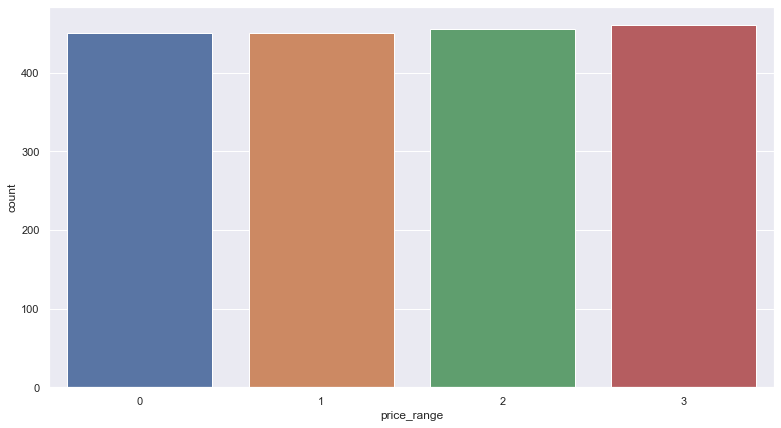

In [14]:
# lets check the distribution of price_range

sns.countplot(dataset["price_range"])
plt.show()

* We can observe from the plot above that our classes in the target variable are almost balanced. There isn't much difference between the classes (0,1,2,3).

### **Let us check the distribution of the categorical features:**

In [15]:
# value counts for each categorical feature
print('Bluetooth\n', dataset['blue'].value_counts())
print('Dual Sim\n', dataset['dual_sim'].value_counts())
print('4G\n', dataset['four_g'].value_counts())
print('3G\n', dataset['three_g'].value_counts())
print('Touch Screen\n', dataset['touch_screen'].value_counts())
print('Wifi\n', dataset['wifi'].value_counts())

Bluetooth
 1    916
0    903
Name: blue, dtype: int64
Dual Sim
 1    918
0    901
Name: dual_sim, dtype: int64
4G
 1    954
0    865
Name: four_g, dtype: int64
3G
 1    1384
0     435
Name: three_g, dtype: int64
Touch Screen
 1    923
0    896
Name: touch_screen, dtype: int64
Wifi
 1    934
0    885
Name: wifi, dtype: int64


### **Lets plot Distribution of categorial features**

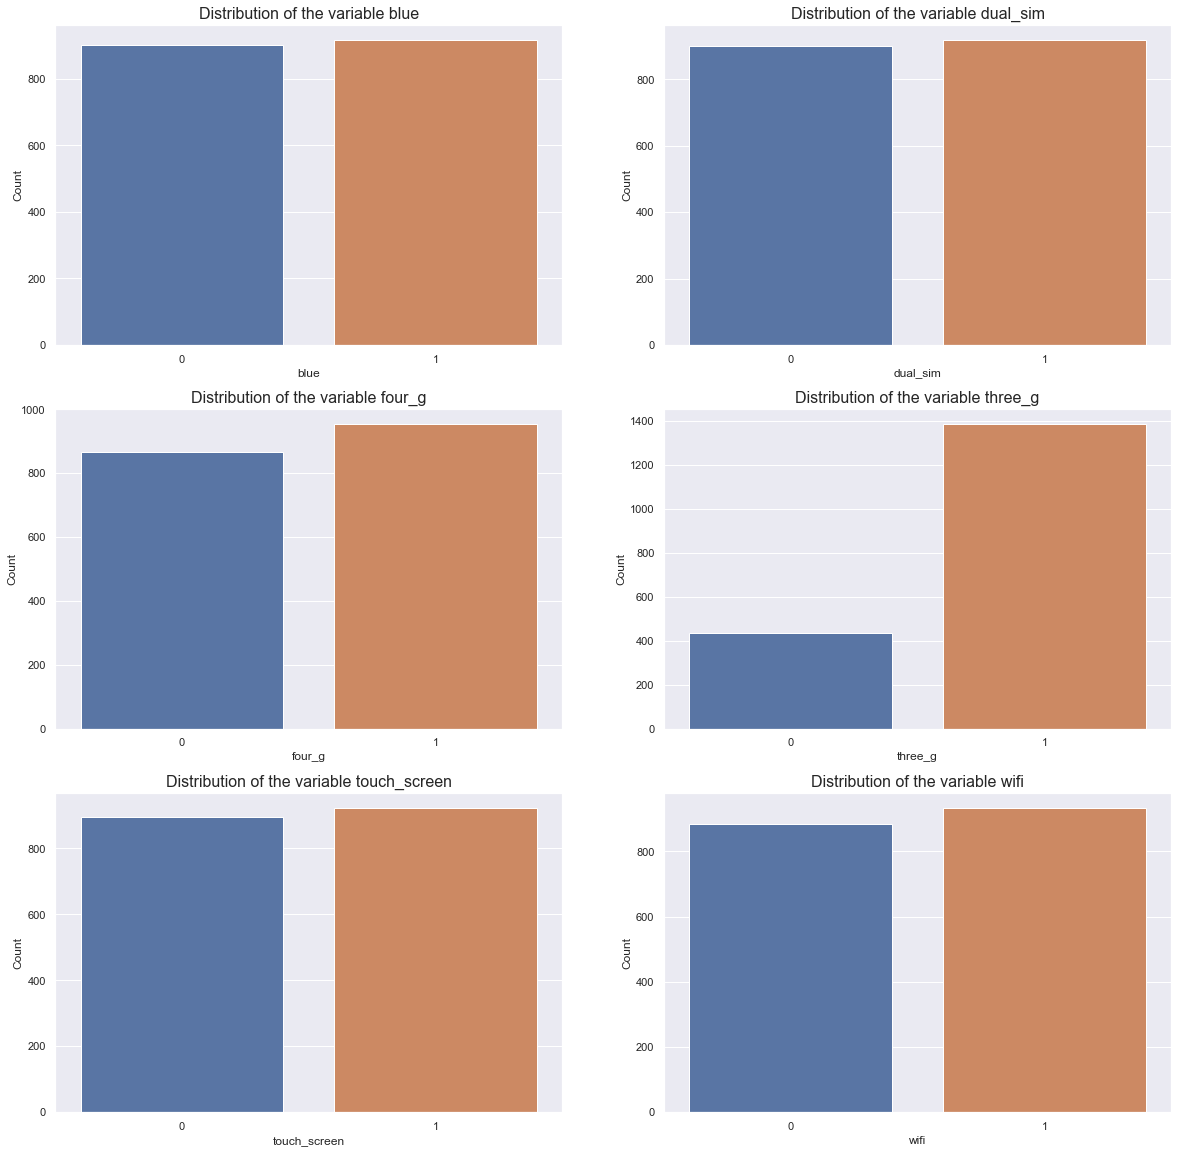

In [16]:
# Lets plot Distribution of categorial features

count = 1
plt.subplots(figsize=(20,20))
for feature in cat_features:
    plt.subplot(3, 2, count)
    sns.countplot(dataset[feature])
    plt.title(f"Distribution of the variable {feature}", fontsize=16)
    plt.xlabel(f'{feature}')
    plt.ylabel("Count")
    count += 1

* From the plots above we can see that most of the categorical features have a similar distribution except the feature 'three_g' where there are very few mobiles which doesn't support 3G. Almost all phones have 3G network access if not 4G.

### **Let us now check the distribution of the numerical features:**

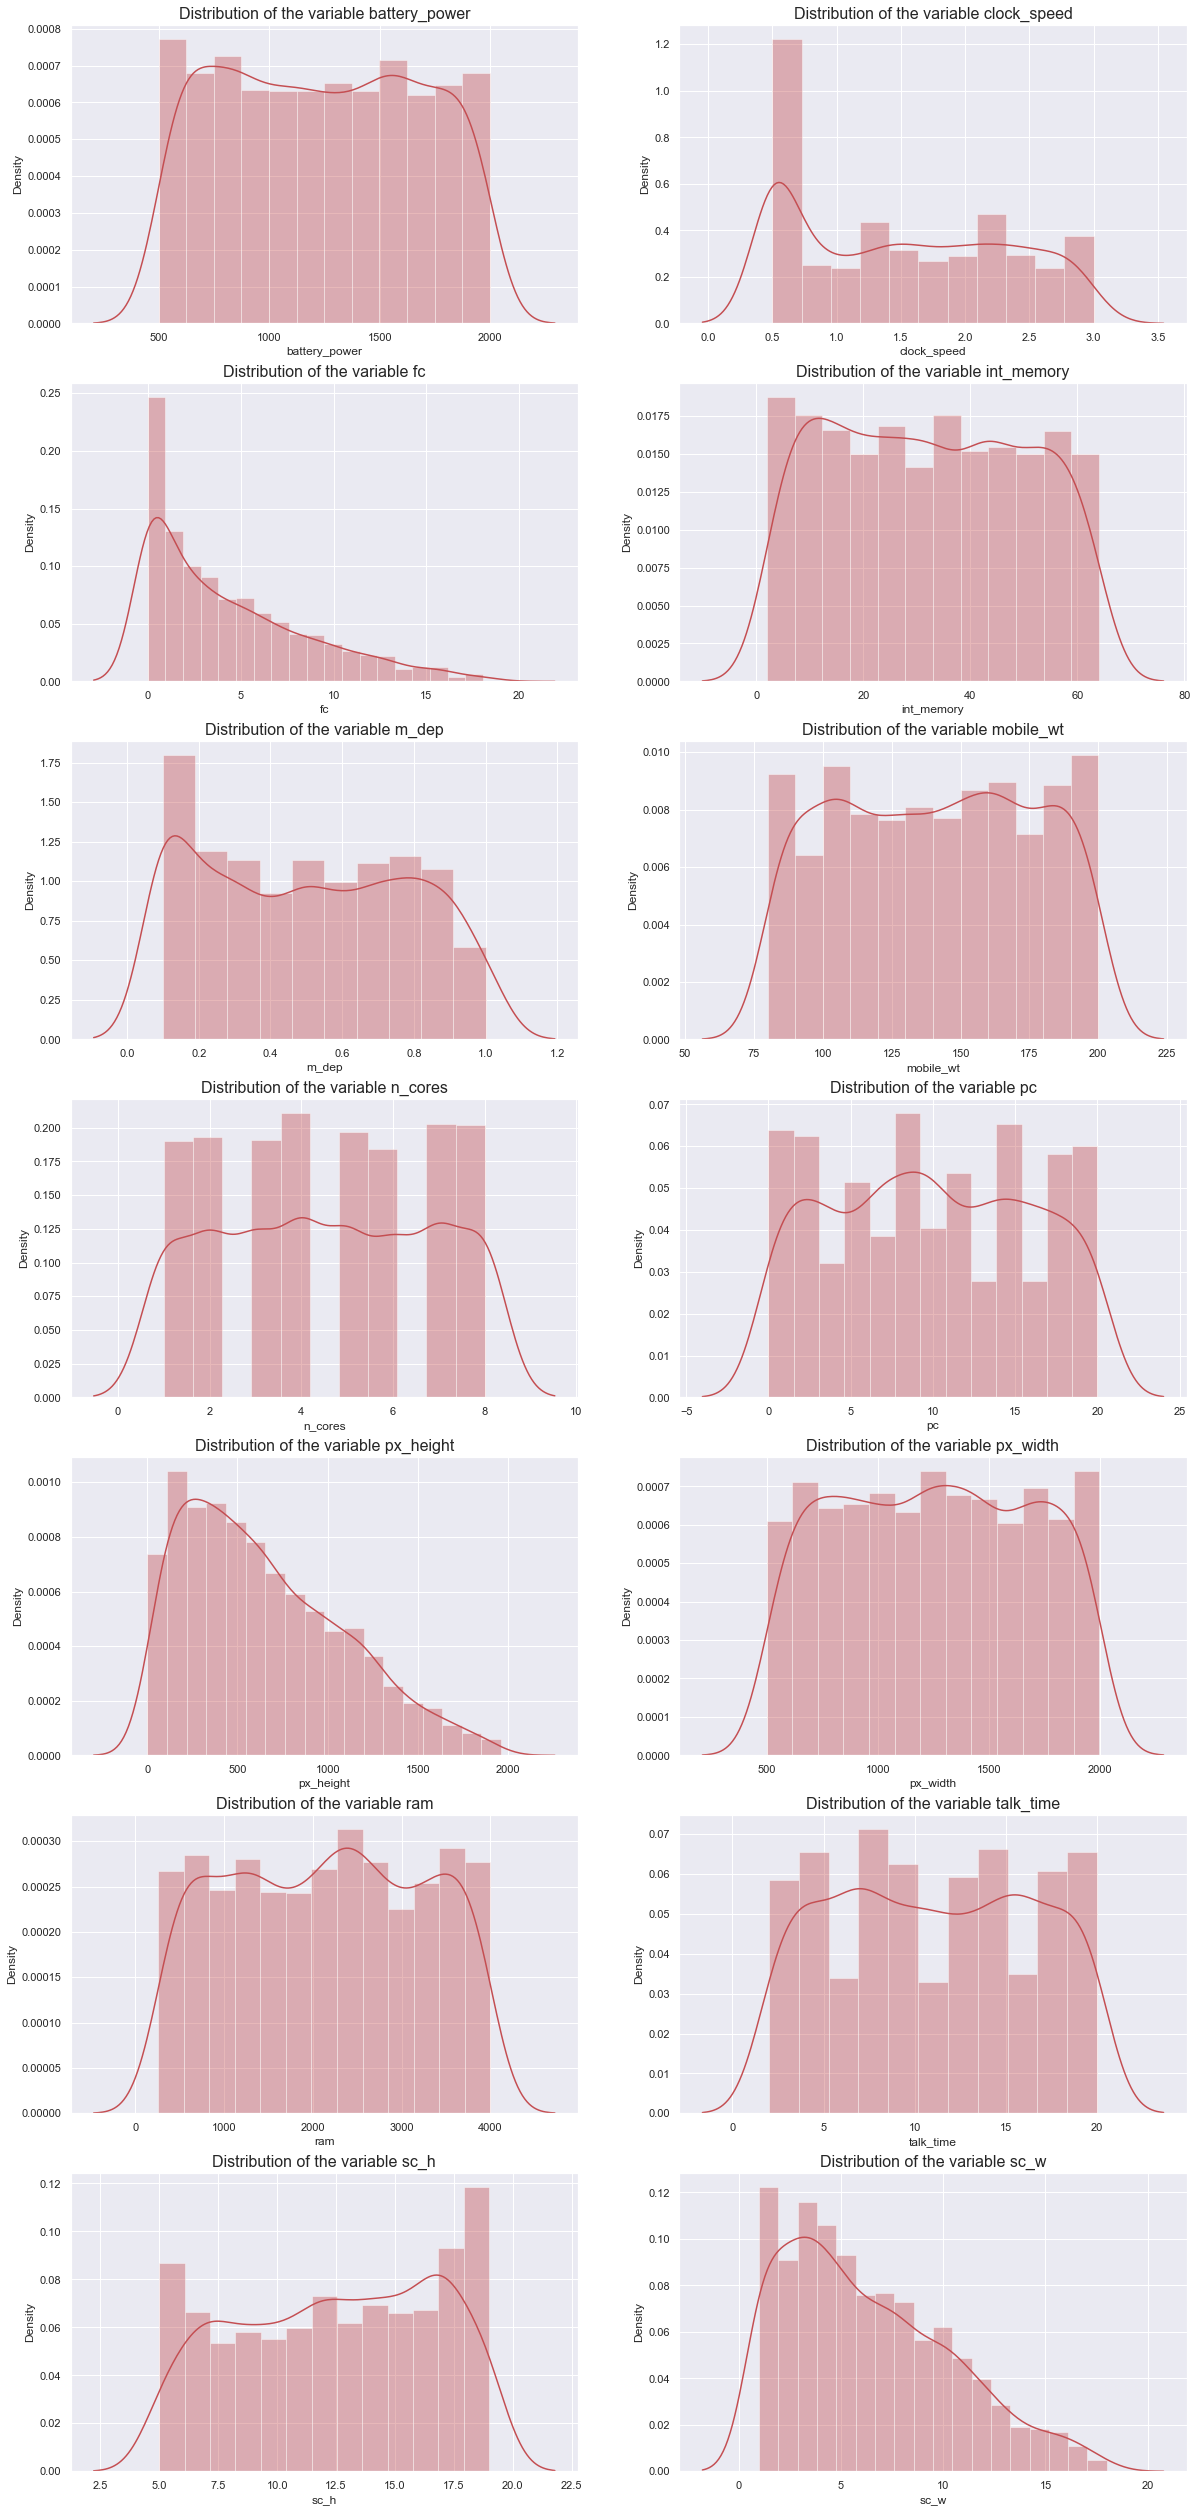

In [17]:
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
    plt.subplot(7, 2, count)
    sns.distplot(dataset[feature], color = 'r')
    plt.title(f"Distribution of the variable {feature}", fontsize=16)
    plt.xlabel(f'{feature}')
    plt.ylabel('Density')
    count += 1

From the plots above we can conclude that,

* Many features have an almost uniform distribution which means there are products available almost equally in all sizes/values.

* Few features like fc, px_height and sc_w are right skewed means there are more number of products listed with the lesser size/value available.

### **Let us check the outliers for the numerical features:**

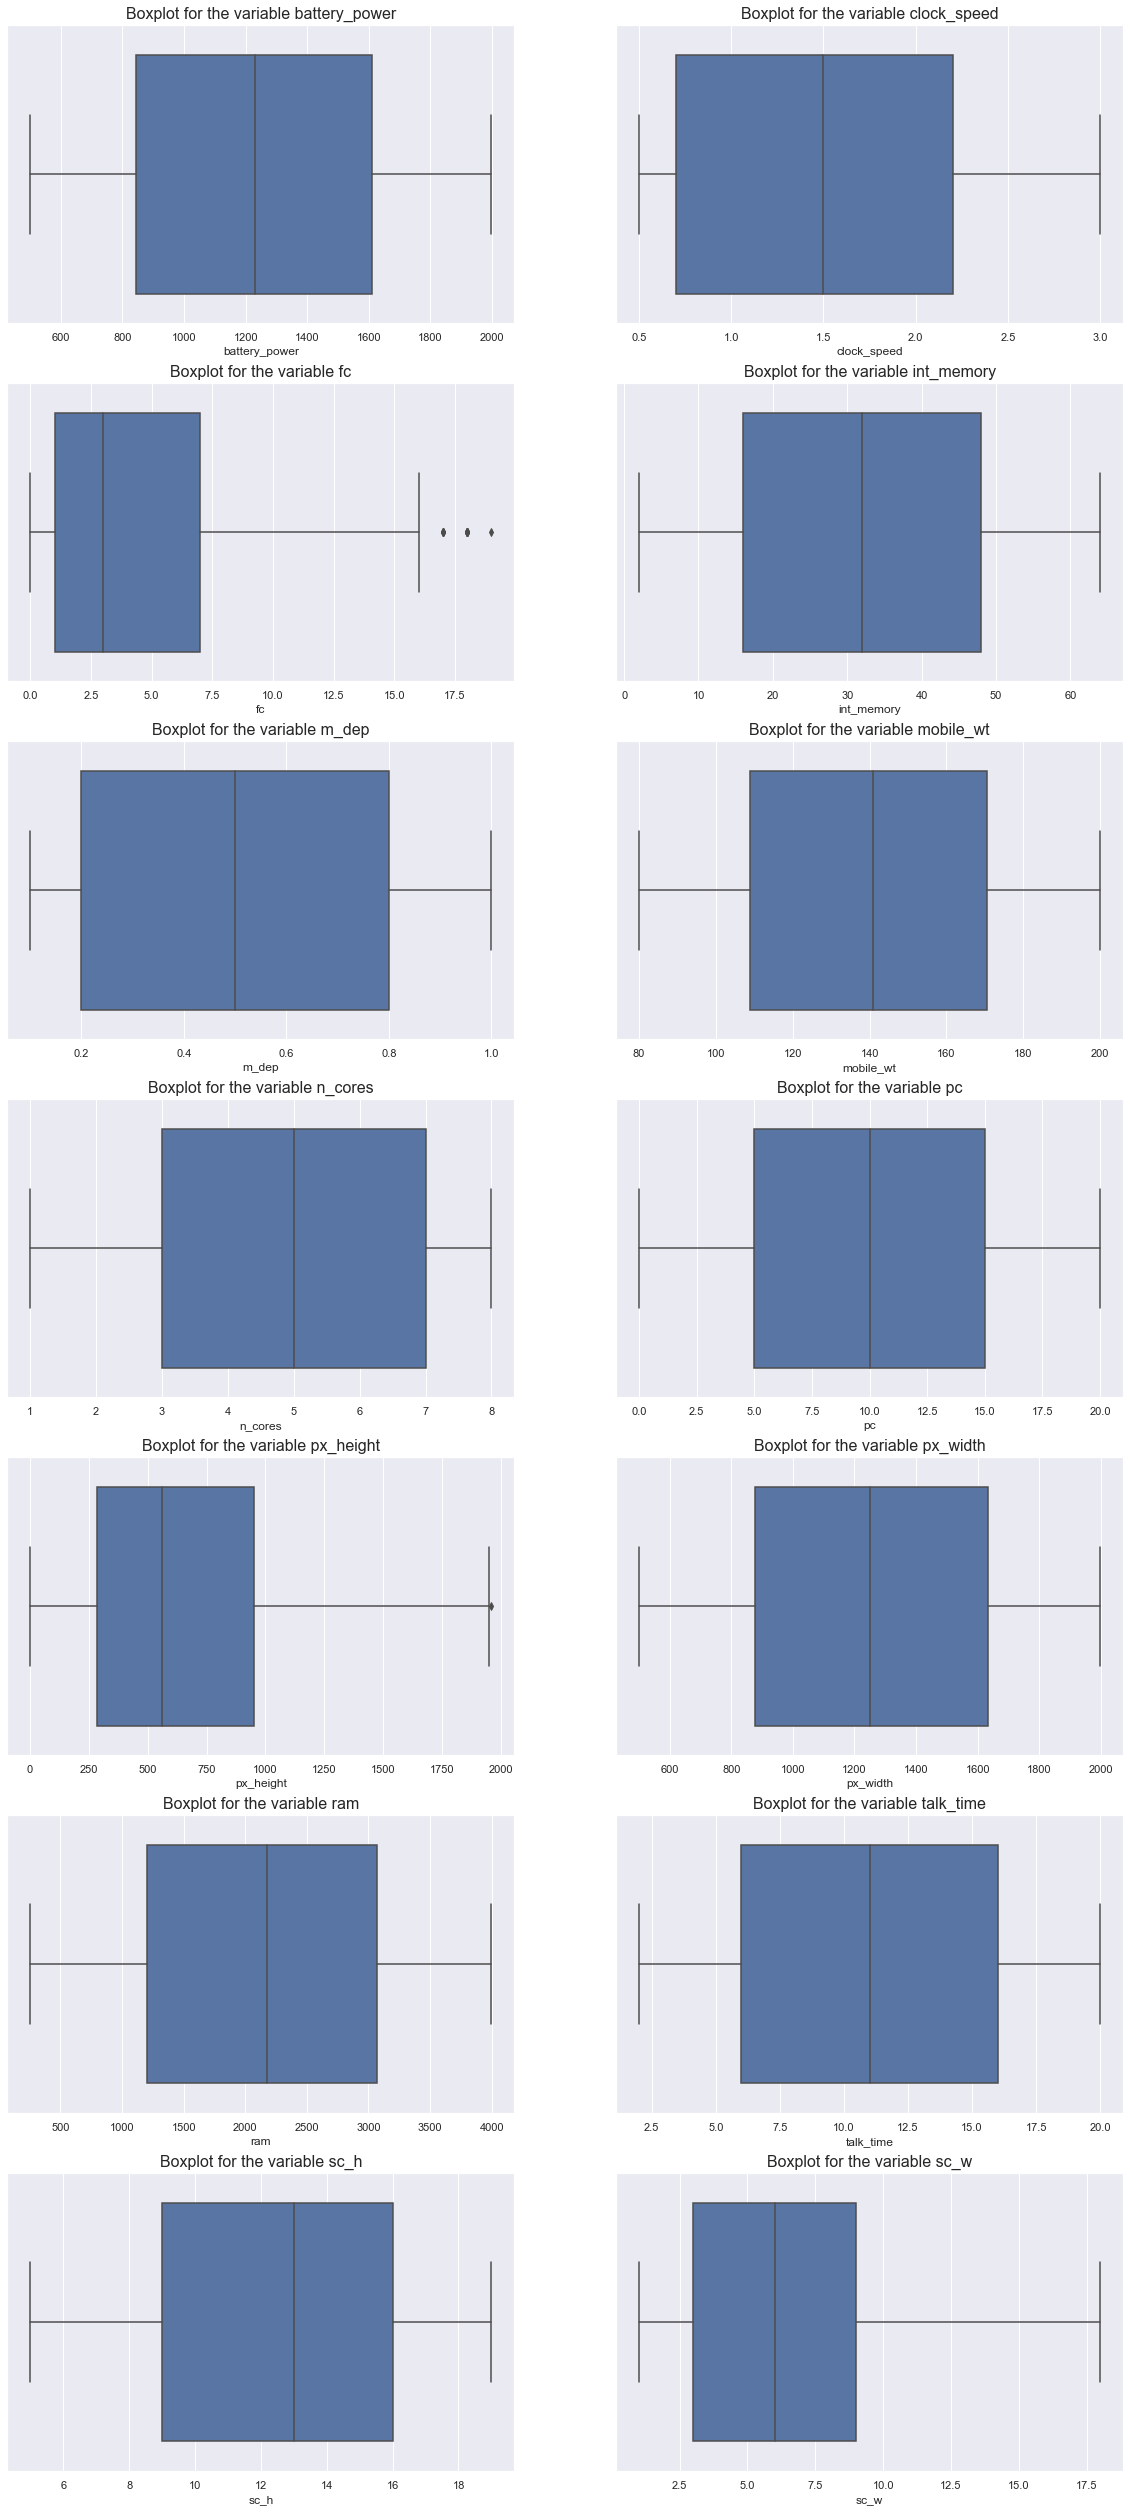

In [18]:
# plot the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  sns.boxplot(dataset[feature])
  plt.title(f"Boxplot for the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  count += 1

* The boxplots suggest us that there are outliers in fc and px_height but we won't treat any value as outlier here because these values are possible realistically to have in different kinds of mobiles available in the market.

* We know that there are phones which have 20MP or more as front camera so it is possible to have values upto 17.5MP as front camera.

* We have even seen that there are big sized mobile phones which require more resolution available having 4K, pure HD screens etc.

### **Let us now check how each numerical feature vary with different price ranges?**

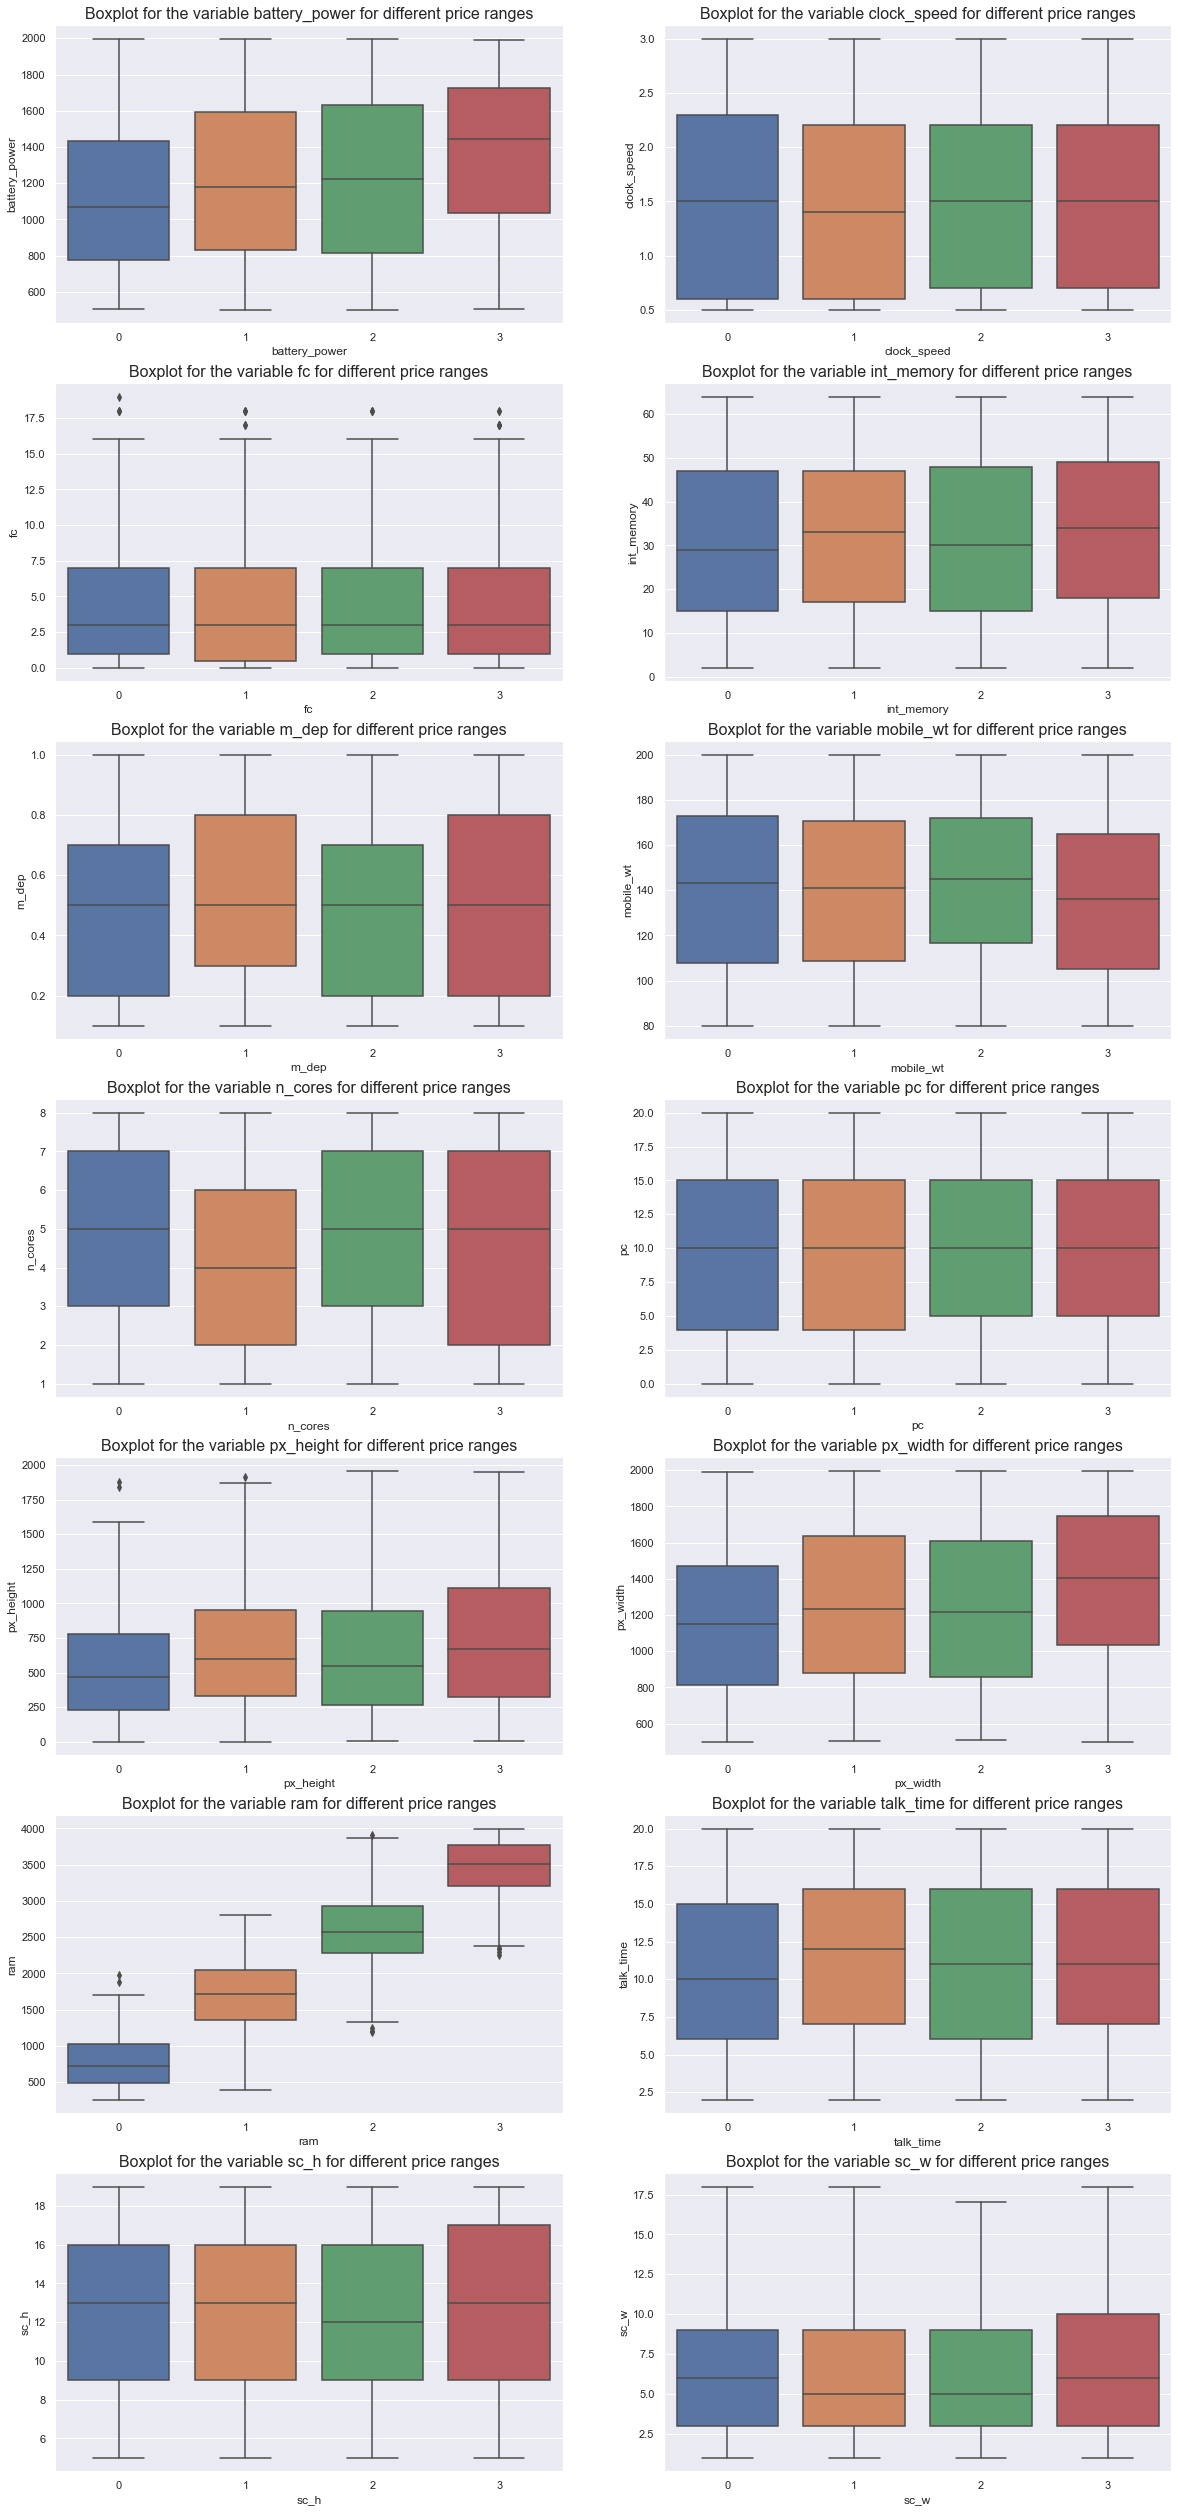

In [19]:
# plot the boxplots of the numerical features
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  sns.boxplot(y=dataset[feature], x=dataset['price_range'])
  plt.title(f"Boxplot for the variable {feature} for different price ranges", fontsize=16)
  plt.xlabel(f"{feature}")
  count += 1

From the above plots we can conclude that,

* Battery power is linearly related to price as price increases with battery power.

* Clock speed isn't linearly related as it doesn't increase with price range. We have more choices available for better clock speed in low cost category.

* Front camera remains the same across all the price ranges. The price range doesn't depend much on the front camera.

* Internal memory even remains the same across all the price ranges except for slight changes.

* There are more number of mobile phones available with more depth in the medium cost and very high cost category as compared to other price categories.

* We can get more number of mobile phones with less weight in the very high cost category.

* The median value of n_cores is more in the low cost and high cost category but we have more options to choose n_cores from in the very high cost category.

* Primary camera remains the same across all the price ranges.

* Pixel height and width increase slightly for the very high cost category which means you get more pixel resolution in the very high cost category.

* Price is linearly related to RAM as it increases with RAM. There is a good  difference in RAM between each of the price ranges. RAM is going to be an influential factor in predicting the mobile price ranges.

* The median value for talk time and screen size (i.e, sc_h and sc_w) remains almost the same across all the price categories. Thus the price doesn't depend much on these two features.

* Any feature which is increasing or decreasing with price will contribute a lot towards the mobile price prediction.

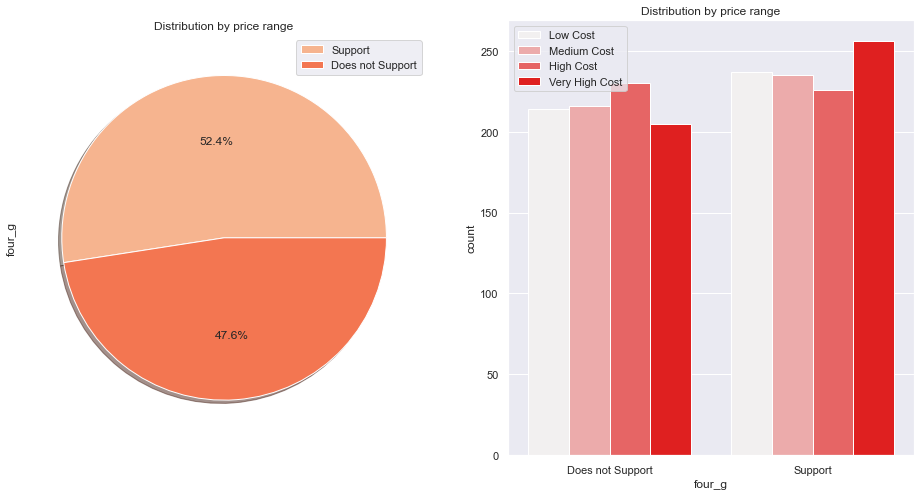

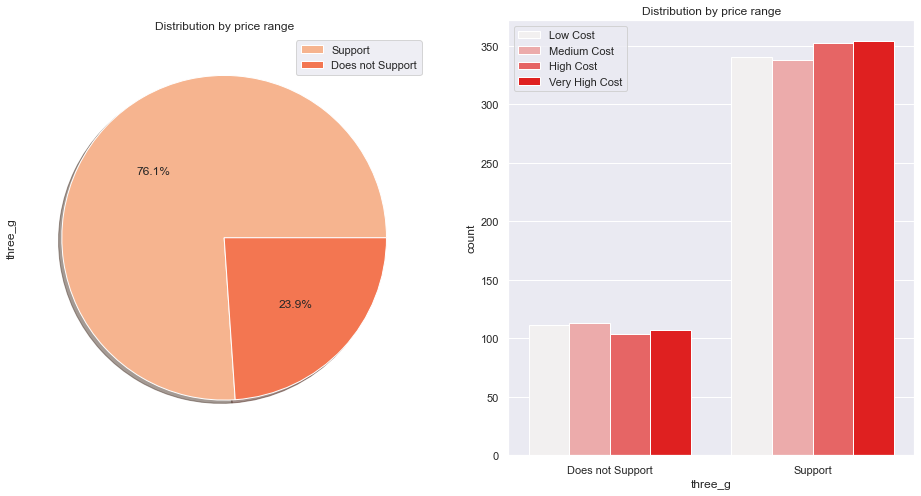

In [20]:
binary_features = [ 'four_g', 'three_g']
for df in binary_features:
  palette_color =sns.color_palette('rocket_r')  
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16, 8))


  dataset[df].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = df, hue = 'price_range', data = dataset, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(df)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

## **Correlation Analysis:**

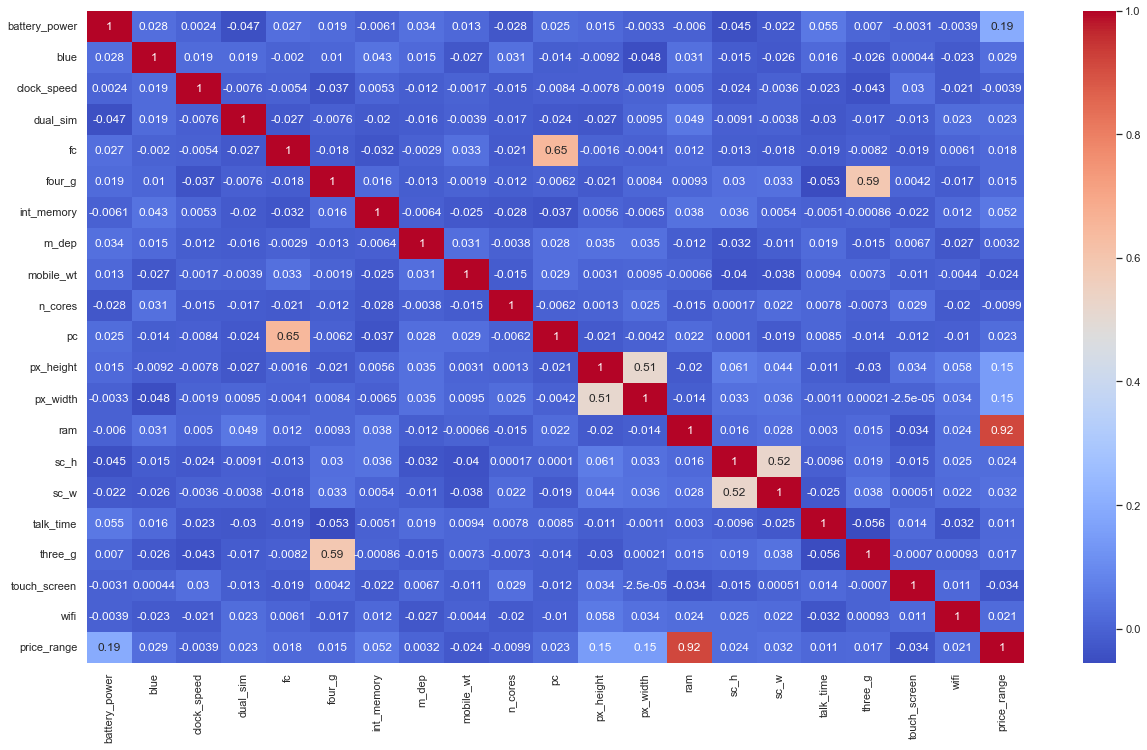

In [21]:
# check correlation with a heatmap
plt.figure(figsize=(21,12))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

From the correlation plot above we can observe that,

* RAM is the only feature strongly correlated with the target variable which means RAM is a strong predictor for the price range variable.

* fc and pc are correlated with a value of 0.65 which is obvious as primary camera increases front camera also increases. We cannot combine these features as both of these are different parameters while buying a mobile.

* three_g and four_g are correlated with a value of 0.59 which is again obvious as whichever mobile supports 4G supports 3G too but not vice versa.

* Most of the independent variables are not strongly correlated to each other, hence we do not need to eliminate any feature.

### **Let us find out how number of cores and battery power vary with price range?**

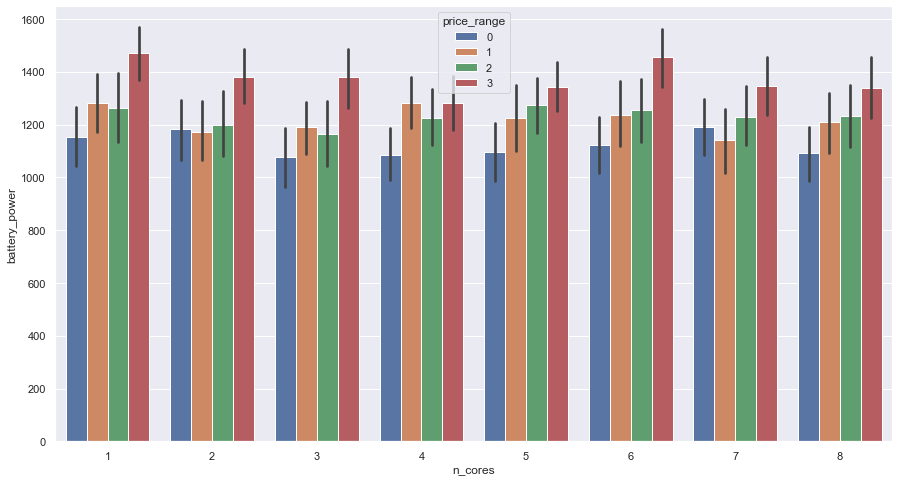

In [22]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'n_cores', y = 'battery_power', hue = 'price_range', data = dataset)
plt.show()

* For every different core, we get the maximum battery power in the very high cost category of mobile phones.

* For every number of cores available, we have the option to choose from any price category.

* On an average 1, 4 and 6 cores has the most battery power available across all price ranges.

### **Let us now check how the numerical features are correlated with the target variable:**

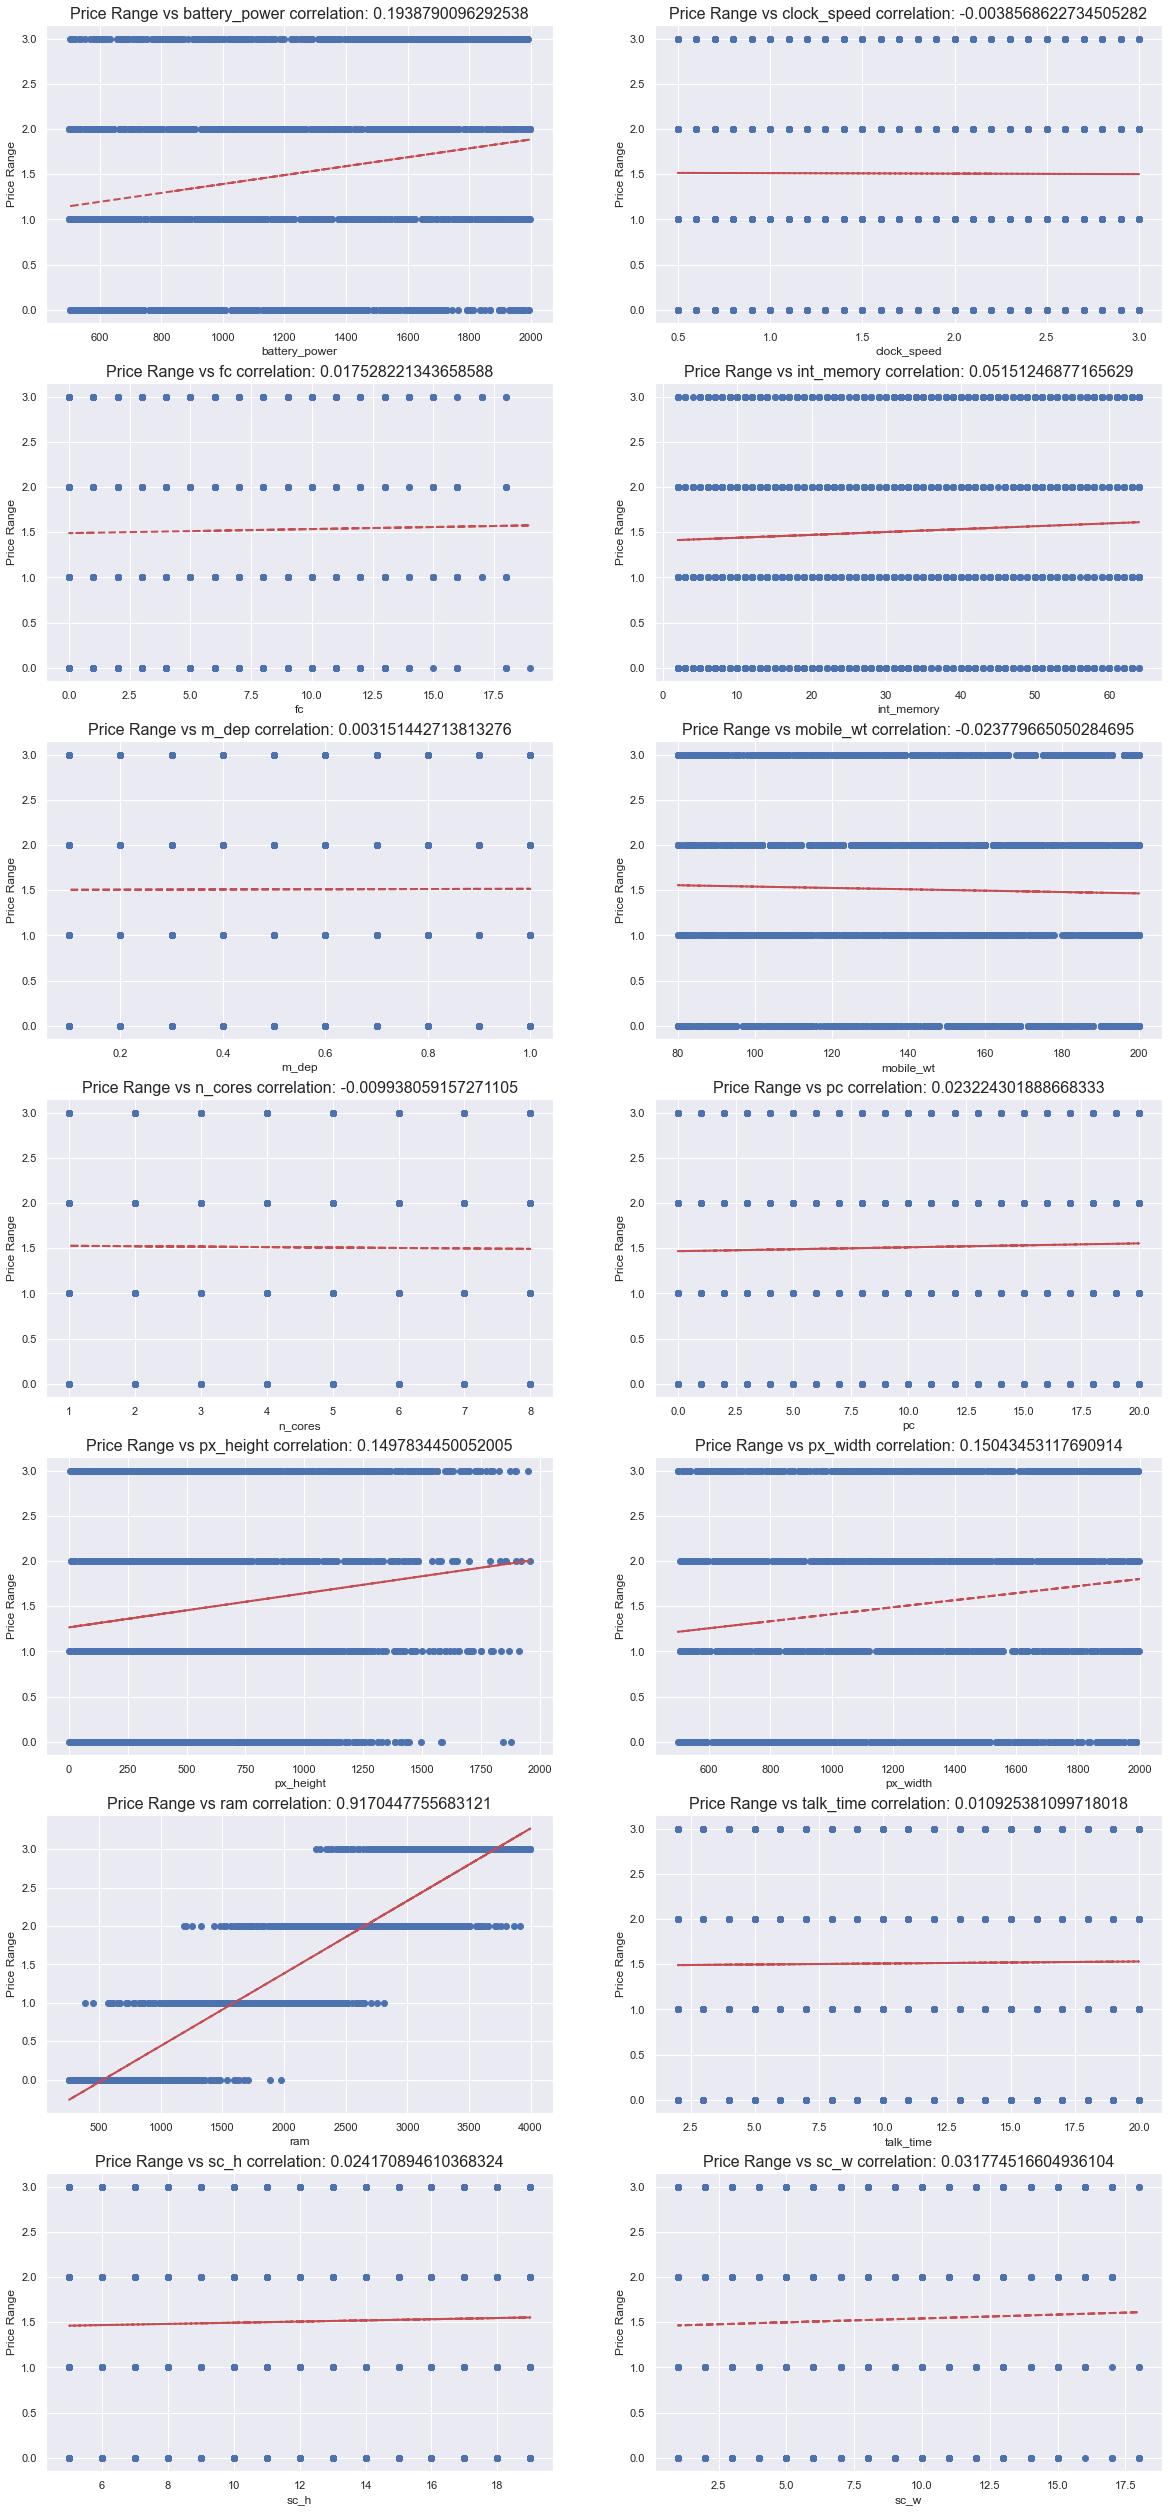

In [23]:
# relation of numerical features with the target variable
count = 1
plt.subplots(figsize=(20,45))
for feature in num_features:
  plt.subplot(7,2,count)
  var = dataset[feature]
  label = dataset['price_range']
  correlation = var.corr(label)
  plt.scatter(x = var, y = label)
  plt.xlabel(feature)
  plt.ylabel('Price Range')
  plt.title(f"Price Range vs {feature} correlation: {correlation}", fontsize=16)
  z = np.polyfit(var, label, 1)
  y_hat = np.poly1d(z)(dataset[feature])
  plt.plot(dataset[feature], y_hat, "r--", lw=2)
  count += 1

From the correlation plots above we can see that,

* Only RAM is strongly correlated with the target variable. RAM will have a strong influence in determining the price ranges.

* Battery Power, px_height and px_width are slightly correlated with the target variable and rest all of the features are not correlated or have very low correlation with the target variable.

**Feature_creation**:The pixel dimensions may be determined by multiplying both the width and the height by the Dots Per Inch.

pixel= pixel_Height*pixel_width

In [24]:
dataset['pixels'] = dataset['px_height']*dataset['px_width']

In [25]:
dataset['pixels'].head()

0      15120
1    1799140
2    2167308
3    2171776
4    1464096
Name: pixels, dtype: int64

#### Lets Drop unwanted features

In [26]:
dataset.drop(['px_height', 'px_width','blue'], axis = 1, inplace = True)

In [27]:
dataset.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range',
       'pixels'],
      dtype='object')

In [28]:
len(dataset.columns)

19

## **Data Preparation:**

In [29]:
# create the set of dependent and independent variables
X = dataset.drop(labels='price_range', axis=1)
Y = dataset['price_range']

# print the shape of X and Y
print("The shape of X is", X.shape)
print("The shape of Y is", Y.shape)

The shape of X is (1819, 18)
The shape of Y is (1819,)


### **Let us define a function for confusion matrix:**

In [30]:
def matrix(actual, predicted):
    labels = ['0','1','2','3']
    cm = confusion_matrix(actual, predicted)
    print(cm)
    
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax=ax)
    
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel('Actual labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

### **Let split the data into train and test set:**

In [31]:
X_test, X_train, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print("The shape of training set is", X_train.shape, Y_train.shape)
print("The shape of testing set is", X_test.shape, Y_test.shape)

The shape of training set is (364, 18) (1455,)
The shape of testing set is (1455, 18) (364,)


### **Lets transform the data**

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Building a Logistic Regression Model:**

In [33]:
# function for logistic regression
def logistic_regression(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)

  # transforming the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # build a logistic regression model
  log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
  log_reg.fit(X_train, Y_train)

  # get the predicted probabilities
  logistic_train_prob = log_reg.predict_proba(X_train)
  logistic_test_prob = log_reg.predict_proba(X_test)

  # get the predicted classes
  logistic_train_class = log_reg.predict(X_train)
  logistic_test_class = log_reg.predict(X_test)

  # calculating accuracy on train and test set
  logistic_train_acc = accuracy_score(Y_train, logistic_train_class)
  logistic_test_acc = accuracy_score(Y_test, logistic_test_class)

  print("\n")
  print("The accuracy on train dataset is", logistic_train_acc)
  print("The accuracy on test dataset is", logistic_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  log_precision = precision_score(Y_test, logistic_test_class, average='weighted')
  print("The precision on test dataset is", log_precision)

  log_recall = recall_score(Y_test, logistic_test_class, average='weighted')
  print("The recall on test dataset is", log_recall)

  # calculating roc_auc_score on the test set
  log_roc = roc_auc_score(Y_test, logistic_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", log_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, logistic_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n")
  print("Confusion matrix for test set:")
  matrix(Y_test, logistic_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, logistic_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': logistic_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  return logistic_test_acc, log_precision, log_recall, log_roc

### **Evaluating the Model:**

The shape of training set is (1455, 18) (1455,)
The shape of testing set is (364, 18) (364,)


The accuracy on train dataset is 0.9422680412371134
The accuracy on test dataset is 0.9340659340659341


The precision on test dataset is 0.9334734097650061
The recall on test dataset is 0.9340659340659341
The roc auc score on test dataset is 0.9935397912278839


Confusion matrix for train set:
[[343   9   0   0]
 [ 10 331  16   0]
 [  0  15 336  17]
 [  0   0  17 361]]


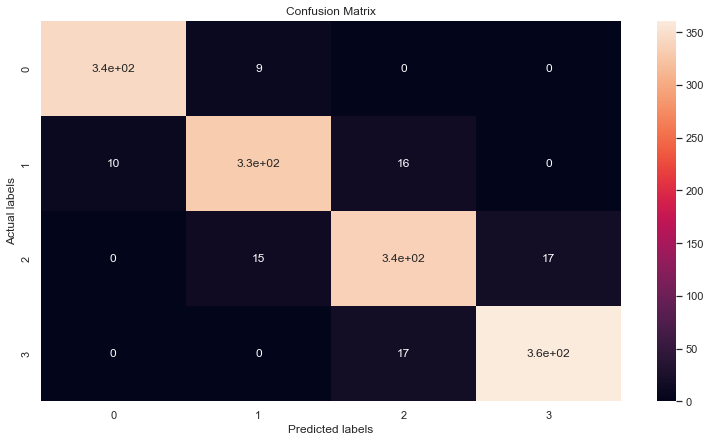

<Figure size 936x504 with 0 Axes>



Confusion matrix for test set:
[[99  0  0  0]
 [ 4 87  3  0]
 [ 0  7 75  6]
 [ 0  0  4 79]]


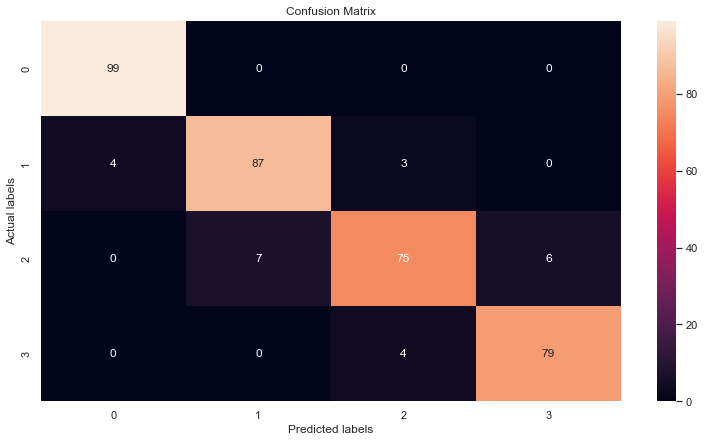

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       0.93      0.93      0.93        94
           2       0.91      0.85      0.88        88
           3       0.93      0.95      0.94        83

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                3
558              2                2
453              0                0
683              2                2


In [34]:
# run the model
lr = logistic_regression(X,Y)

In [35]:
# store the metrics of logistic regression
log_acc = lr[0]
log_precision = lr[1]
log_recall = lr[2]
log_roc = lr[3]

## **Building a Random Forest Model:**

In [36]:
# function for random forest
def random_forest(X,Y):

  # split the data into train and test set
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
  print("The shape of training set is", X_train.shape, Y_train.shape)
  print("The shape of testing set is", X_test.shape, Y_test.shape)
  print("\n")

  # hyperparameters
  param_dict = {'n_estimators': [int(x) for x in np.linspace(100,300,3)],
              'max_depth': [int(x) for x in np.linspace(5,10,5)],
              'min_samples_split': [int(x) for x in np.linspace(5,15,3)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,5,5)]}

  # build a random forest model
  rf_model = RandomForestClassifier()

  # random search
  rf_grid = RandomizedSearchCV(estimator=rf_model,
                       param_distributions= param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

  rf_grid.fit(X_train,Y_train)

  print(rf_grid.best_estimator_)
  rf_optimal_model = rf_grid.best_estimator_
  print(rf_grid.best_params_)

  # get the predicted probabilities
  rf_train_prob = rf_optimal_model.predict_proba(X_train)
  rf_test_prob = rf_optimal_model.predict_proba(X_test)

  # get the predicted classes
  rf_train_class = rf_optimal_model.predict(X_train)
  rf_test_class = rf_optimal_model.predict(X_test)

  # calculating accuracy on train and test set
  rf_train_acc = accuracy_score(Y_train, rf_train_class)
  rf_test_acc = accuracy_score(Y_test, rf_test_class)

  print("\n")
  print("The accuracy on train dataset is", rf_train_acc)
  print("The accuracy on test dataset is", rf_test_acc)
  print("\n")

  # calculating precision and recall on the test set
  rf_precision = precision_score(Y_test, rf_test_class, average='weighted')
  print("The precision on test dataset is", rf_precision)

  rf_recall = recall_score(Y_test, rf_test_class, average='weighted')
  print("The recall on test dataset is", rf_recall)

  # calculating roc_auc_score on the test set
  rf_roc = roc_auc_score(Y_test, rf_test_prob, multi_class='ovo', average='weighted')
  print("The roc auc score on test dataset is", rf_roc)

  # training confusion matrix
  print("\n")
  print("Confusion matrix for train set:")
  matrix(Y_train, rf_train_class)
  plt.figure()
  plt.show()
  # testing confusion matrix
  print("\n Confusion matrix for test set:")
  matrix(Y_test, rf_test_class)
  plt.figure()
  plt.show()

  print("\n Classification report:")
  print(classification_report(Y_test, rf_test_class))
  print("\n")

  # prediction in a dataframe
  pred = pd.DataFrame({'Actual Label': Y_test,
                       'Predicted Label': rf_test_class})
  print("The top 5 rows of actual vs predicted labels\n", pred.head())

  # calculate the feature importances
  features = X_train.columns
  importances = rf_optimal_model.feature_importances_
  indices = np.argsort(importances)

  importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)

  plt.figure(figsize=(15,25))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()

  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  pd.set_option('display.max_columns', 200)
  pd.set_option('display.max_rows', 200)
  print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

  return rf_test_acc, rf_precision, rf_recall, rf_roc

The shape of training set is (1455, 18) (1455,)
The shape of testing set is (364, 18) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END max_depth=7, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=3, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_le

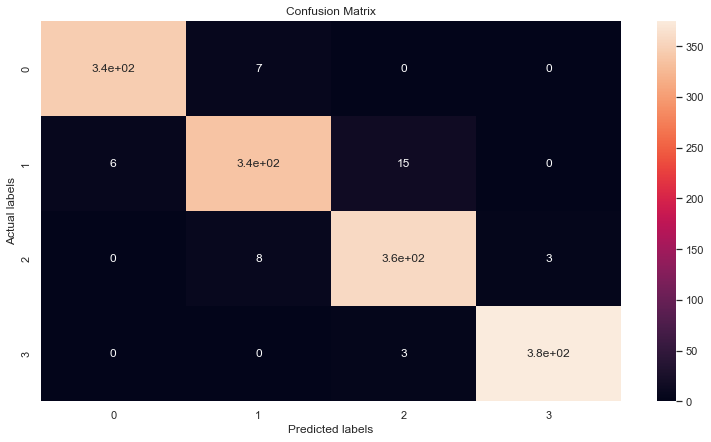

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[93  6  0  0]
 [ 5 78 11  0]
 [ 0 14 63 11]
 [ 0  0  7 76]]


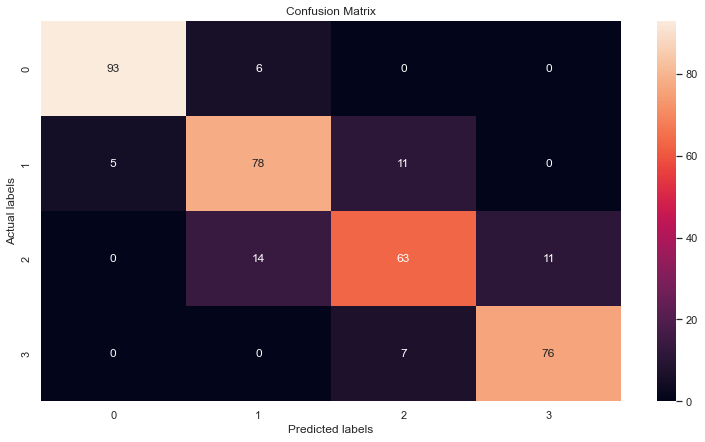

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        99
           1       0.80      0.83      0.81        94
           2       0.78      0.72      0.75        88
           3       0.87      0.92      0.89        83

    accuracy                           0.85       364
   macro avg       0.85      0.85      0.85       364
weighted avg       0.85      0.85      0.85       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                3
453              0                0
683              2                2


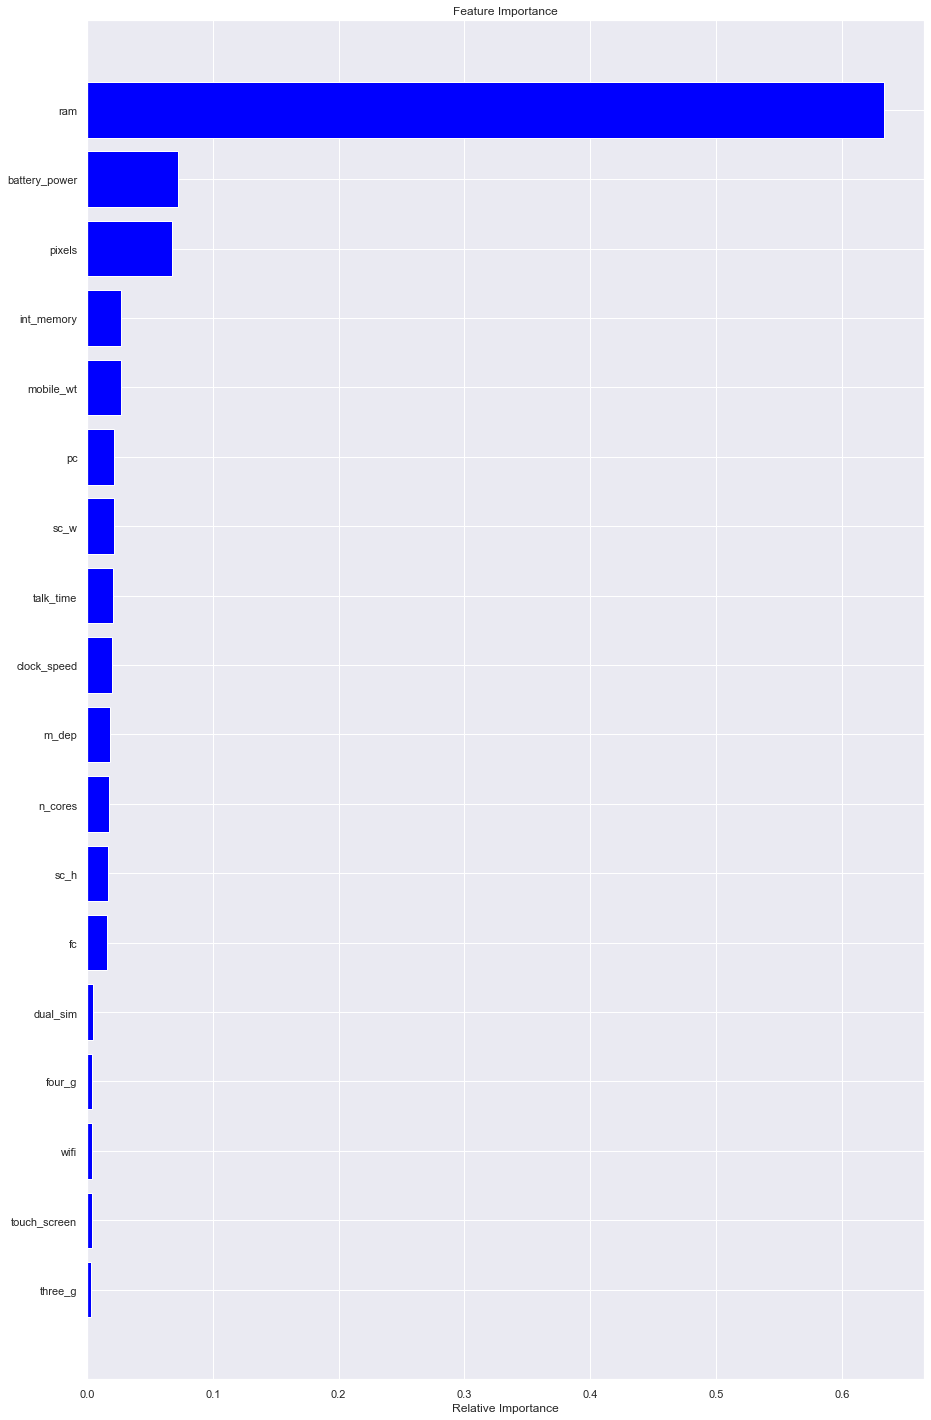

          Feature  Feature Importance
10            ram                0.63
0   battery_power                0.07
17         pixels                0.07
5      int_memory                0.03
7       mobile_wt                0.03
3              fc                0.02
6           m_dep                0.02
8         n_cores                0.02
1     clock_speed                0.02
11           sc_h                0.02
12           sc_w                0.02
13      talk_time                0.02
9              pc                0.02
4          four_g                0.00
2        dual_sim                0.00
14        three_g                0.00
15   touch_screen                0.00
16           wifi                0.00


In [37]:
# run the model
rf = random_forest(X,Y)

#### **Run the model again with the most important features:**

The shape of training set is (1455, 2) (1455,)
The shape of testing set is (364, 2) (364,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=6, min_samples_leaf

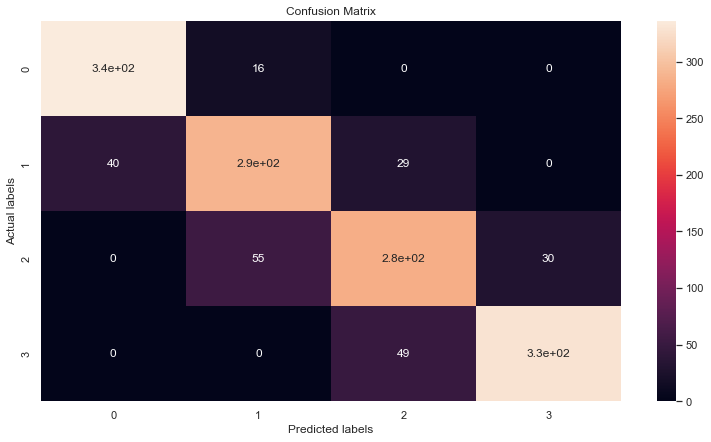

<Figure size 936x504 with 0 Axes>


 Confusion matrix for test set:
[[93  6  0  0]
 [ 7 80  7  0]
 [ 0 18 58 12]
 [ 0  0 19 64]]


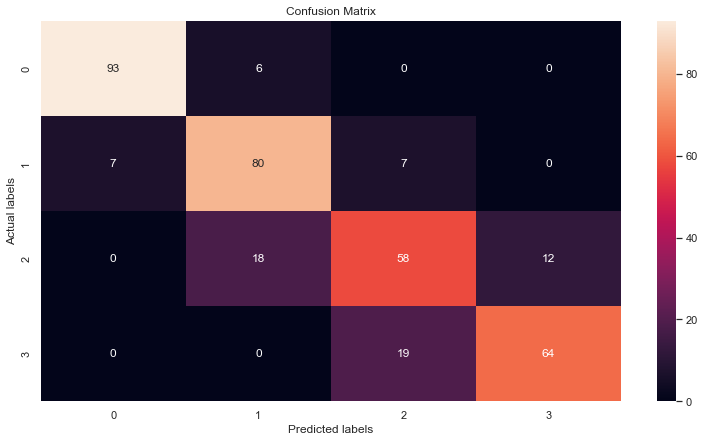

<Figure size 936x504 with 0 Axes>


 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93        99
           1       0.77      0.85      0.81        94
           2       0.69      0.66      0.67        88
           3       0.84      0.77      0.81        83

    accuracy                           0.81       364
   macro avg       0.81      0.81      0.81       364
weighted avg       0.81      0.81      0.81       364



The top 5 rows of actual vs predicted labels
       Actual Label  Predicted Label
1985             3                3
1072             3                2
558              2                1
453              0                0
683              2                2


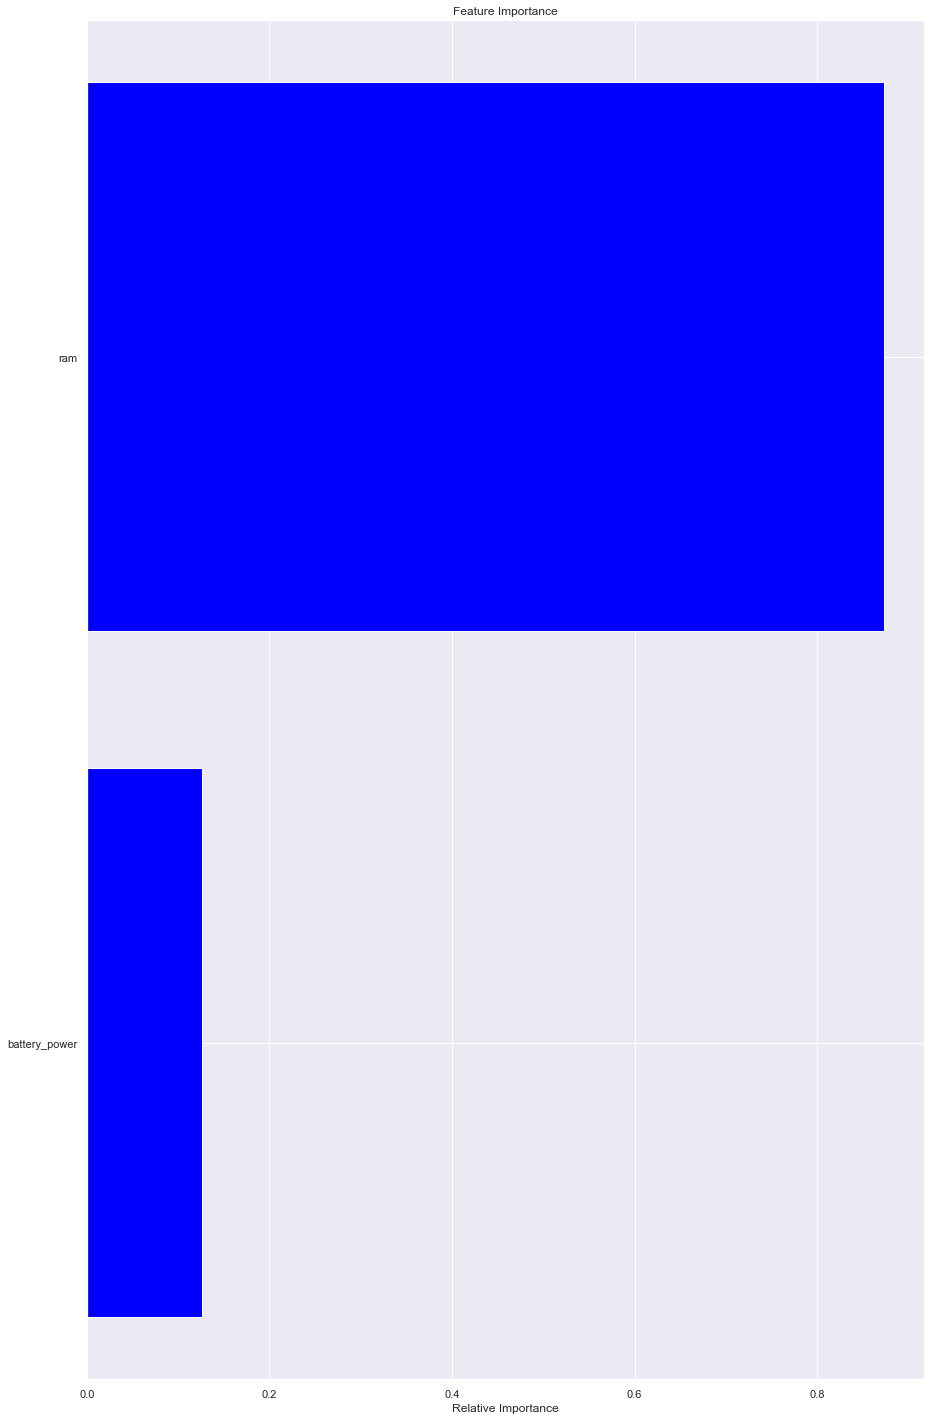

         Feature  Feature Importance
0            ram                0.87
1  battery_power                0.13


In [45]:
# select the most important features for modeling
X_new = dataset[['ram','battery_power']]
rf_new = random_forest(X_new,Y)

In [46]:
# store the metrics of random forest
rf_acc = rf_new[0]
rf_precision = rf_new[1]
rf_recall = rf_new[2]
rf_roc = rf_new[3]